In [2]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to the list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.08094279640396 137.65532234130632
-86.12550841908714 -49.31128195935176
-8.442878127664017 -151.91257351501625
16.294932978549284 -34.166668760053994
65.42943250258273 -91.9508864293473
-80.24093313995846 -100.58084331664416
41.545420091753044 102.00269093527419
-44.64145053322835 -124.86083788912596
86.97907692788195 85.02240216693843
3.828058814471788 67.51100806003575
66.28239507561005 24.944380375852802
68.37613451291773 63.100876161664615
-12.667923712473183 -118.49605818797306
68.91984481262242 -12.112725067118049
9.357023492359772 -62.69835365964188
70.77419608815961 142.89835115187407
30.873223612370083 125.86287962217233
-55.857989603816996 -113.41240496725555
-78.72054292906404 -21.701592906924645
-2.1905047614156246 -72.94028912498266
-79.15845093713479 21.95902838311119
-37.111781930202106 -63.08924223881729
71.7748135491151 -56.698593925349
-62.09758831215497 -66.37360459075943
76.82370028604916 22.246317623912034
79.78131890974706 78.16792812432385
-49.23965971164746 1

In [6]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Starting URL weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | hobyo
Processing Record 2 of Set 1 | mwinilunga
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | ceyhan
Processing Record 8 of Set 1 | acapulco
Processing Record 9 of Set 1 | graham
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | smirnykh
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | campbell river
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | yokadouma
Processing Record 20 of Set 1 | esil
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | atuona


Processing Record 33 of Set 4 | kilrush
Processing Record 34 of Set 4 | siocon
Processing Record 35 of Set 4 | saint-philippe
Processing Record 36 of Set 4 | leningradskiy
Processing Record 37 of Set 4 | limbang
Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | porto novo
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | alyangula
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | laksham
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | ternate
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | novyy urengoy
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | tigil
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | presidente medici
Processing Record 4 of Set 5 | xichang
Processing Record 5

Processing Record 26 of Set 8 | manuk mangkaw
Processing Record 27 of Set 8 | santa isabel
Processing Record 28 of Set 8 | mahebourg
Processing Record 29 of Set 8 | necochea
Processing Record 30 of Set 8 | santiago
Processing Record 31 of Set 8 | parkes
Processing Record 32 of Set 8 | burica
City not found. Skipping...
Processing Record 33 of Set 8 | dongsheng
Processing Record 34 of Set 8 | curup
Processing Record 35 of Set 8 | mounana
Processing Record 36 of Set 8 | port elizabeth
Processing Record 37 of Set 8 | trelew
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | jablah
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | buguey
Processing Record 42 of Set 8 | chamonix-mont-blanc
Processing Record 43 of Set 8 | blackwater
Processing Record 44 of Set 8 | foam lake
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | abu samrah
Processing Record 47 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 48 o

Processing Record 18 of Set 12 | newark
Processing Record 19 of Set 12 | berlevag
Processing Record 20 of Set 12 | barranca
Processing Record 21 of Set 12 | almaznyy
Processing Record 22 of Set 12 | kyabram
Processing Record 23 of Set 12 | moi
Processing Record 24 of Set 12 | the valley
Processing Record 25 of Set 12 | venado tuerto
Processing Record 26 of Set 12 | pingliang
Processing Record 27 of Set 12 | noumea
Processing Record 28 of Set 12 | sao joao da barra
Processing Record 29 of Set 12 | labrea
Processing Record 30 of Set 12 | lucapa
Processing Record 31 of Set 12 | uchaly
Processing Record 32 of Set 12 | mazarron
Processing Record 33 of Set 12 | beloha
Processing Record 34 of Set 12 | do rud
City not found. Skipping...
Processing Record 35 of Set 12 | northam
Processing Record 36 of Set 12 | altamira
Processing Record 37 of Set 12 | makakilo city
Processing Record 38 of Set 12 | panguna
Processing Record 39 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 

In [11]:
len(city_data)

555

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobyo,5.3505,48.5268,75.90,74,22,20.20,SO,2023-01-28 22:22:42
1,Mwinilunga,-11.7358,24.4293,62.02,96,100,3.89,ZM,2023-01-28 22:22:42
2,Punta Arenas,-53.1500,-70.9167,62.71,39,40,37.98,CL,2023-01-28 22:22:43
3,Nikolskoye,59.7035,30.7861,24.80,92,100,11.45,RU,2023-01-28 22:22:43
4,Arraial Do Cabo,-22.9661,-42.0278,80.46,83,0,3.44,BR,2023-01-28 22:22:43
5,Okhotsk,59.3833,143.3000,-17.46,84,98,10.04,RU,2023-01-28 22:22:44
6,Ceyhan,37.0247,35.8175,53.44,76,16,4.34,TR,2023-01-28 22:22:44
7,Acapulco,16.8634,-99.8901,85.82,58,0,6.91,MX,2023-01-28 22:20:06
8,Graham,47.0529,-122.2943,43.70,88,100,6.91,US,2023-01-28 22:22:44
9,Iqaluit,63.7506,-68.5145,-29.47,68,75,3.44,CA,2023-01-28 22:22:45


In [13]:
#new_column_order = ["column1", "column2", "column3", "column5", "column6", "column7", "column8"]
#df = df[new_column_order]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobyo,SO,2023-01-28 22:22:42,5.3505,48.5268,75.90,74,22,20.20
1,Mwinilunga,ZM,2023-01-28 22:22:42,-11.7358,24.4293,62.02,96,100,3.89
2,Punta Arenas,CL,2023-01-28 22:22:43,-53.1500,-70.9167,62.71,39,40,37.98
3,Nikolskoye,RU,2023-01-28 22:22:43,59.7035,30.7861,24.80,92,100,11.45
4,Arraial Do Cabo,BR,2023-01-28 22:22:43,-22.9661,-42.0278,80.46,83,0,3.44
5,Okhotsk,RU,2023-01-28 22:22:44,59.3833,143.3000,-17.46,84,98,10.04
6,Ceyhan,TR,2023-01-28 22:22:44,37.0247,35.8175,53.44,76,16,4.34
7,Acapulco,MX,2023-01-28 22:20:06,16.8634,-99.8901,85.82,58,0,6.91
8,Graham,US,2023-01-28 22:22:44,47.0529,-122.2943,43.70,88,100,6.91
9,Iqaluit,CA,2023-01-28 22:22:45,63.7506,-68.5145,-29.47,68,75,3.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

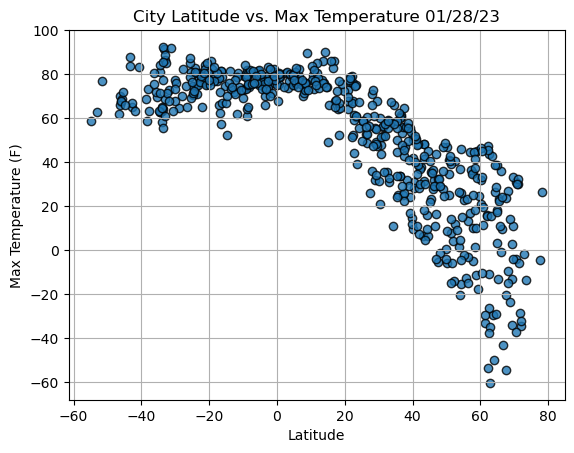

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

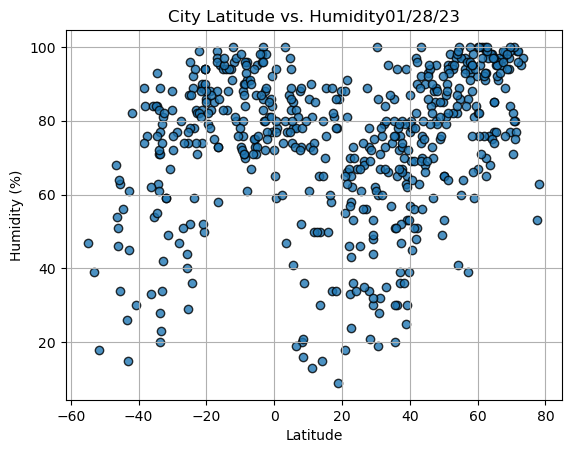

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show Plot.
plt.show()

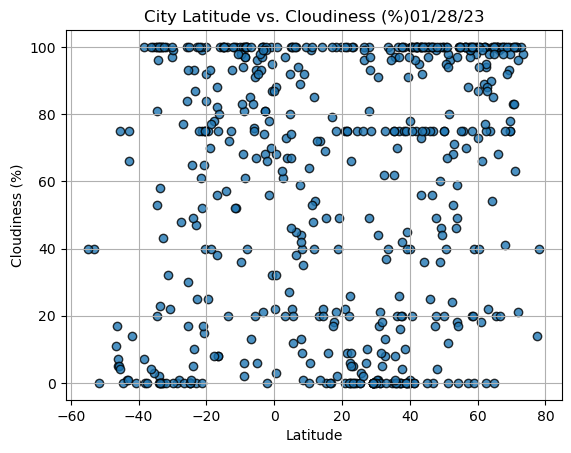

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show Plot.
plt.show()

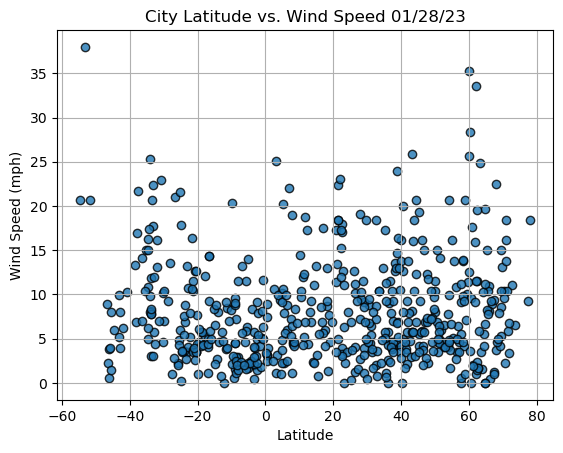

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show Plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a rregression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the reression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " +str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show

In [22]:
index13 = city_data_df.loc[13]
index13

City               Campbell River
Country                        CA
Date          2023-01-28 22:22:46
Lat                       50.0163
Lng                     -125.2446
Max Temp                    46.78
Humidity                       53
Cloudiness                     20
Wind Speed                   8.05
Name: 13, dtype: object

In [24]:
# Filter df based on a value of a row.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobyo,SO,2023-01-28 22:22:42,5.3505,48.5268,75.90,74,22,20.20
3,Nikolskoye,RU,2023-01-28 22:22:43,59.7035,30.7861,24.80,92,100,11.45
5,Okhotsk,RU,2023-01-28 22:22:44,59.3833,143.3000,-17.46,84,98,10.04
6,Ceyhan,TR,2023-01-28 22:22:44,37.0247,35.8175,53.44,76,16,4.34
7,Acapulco,MX,2023-01-28 22:20:06,16.8634,-99.8901,85.82,58,0,6.91


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


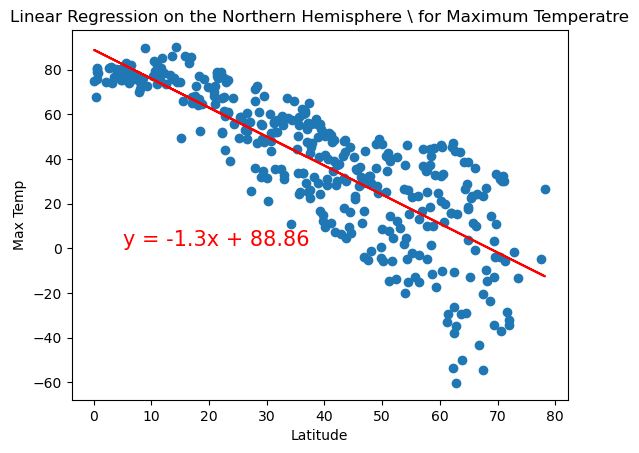

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperatre', 'Max Temp', (5,1))

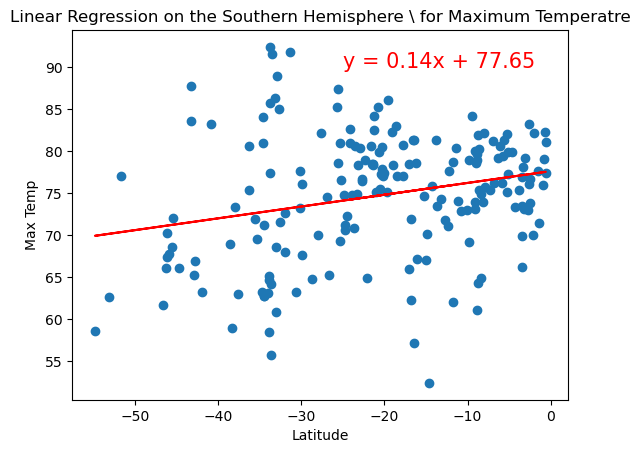

In [42]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Maximum Temperatre', 'Max Temp', (-25,90))

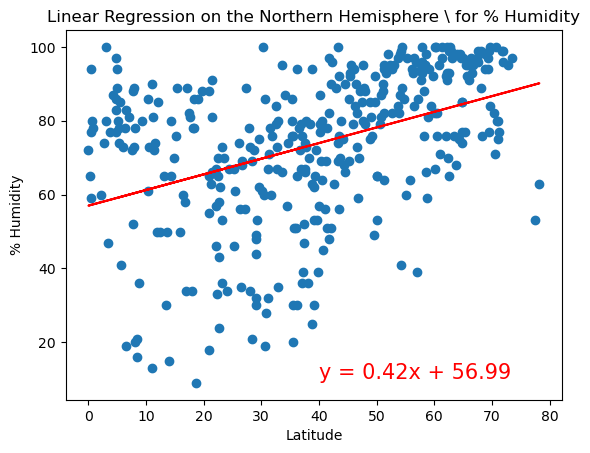

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,10))

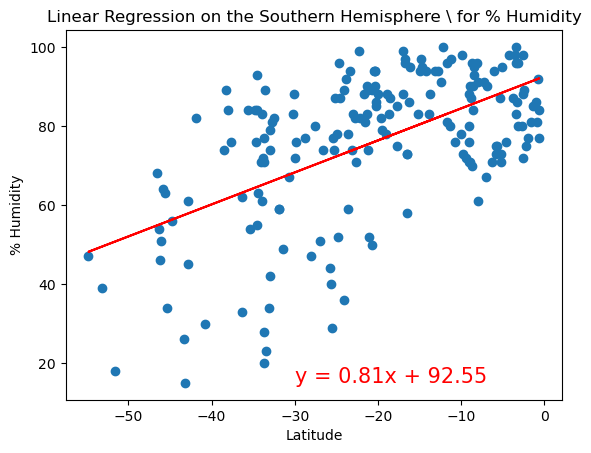

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity', (-30,15))

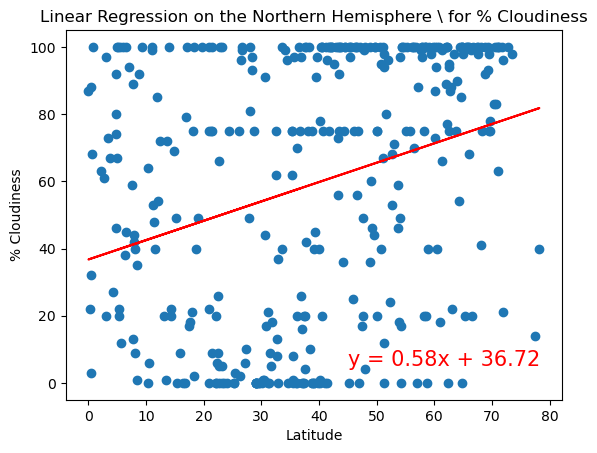

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (45,5))

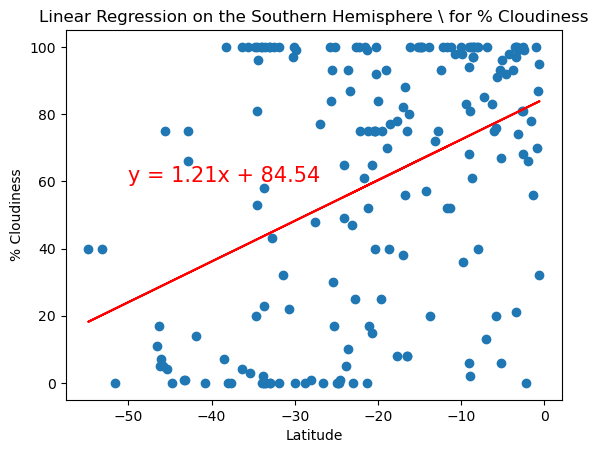

In [50]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness', (-50,60))

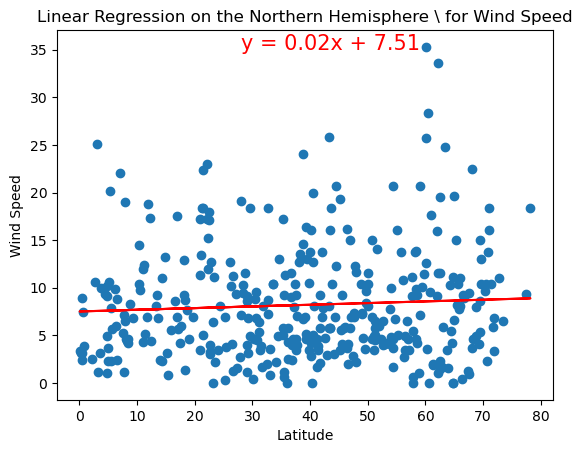

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (28,35))

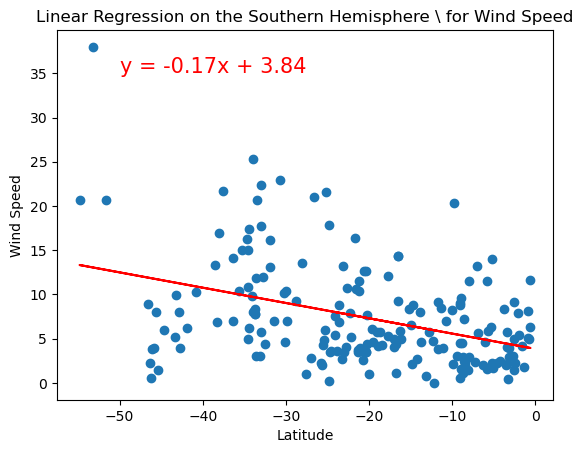

In [56]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed', (-50,35))